<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEMA DE INVENTARIO


In [23]:
import random as rnd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd

Los posibles valores de la demanda tienen diferentes probabilidades de ser seleccionadas, siguiendo una distribución empirica:

In [2]:
def demanda():                            #Esta función calcula y devuelve la demanda
  prob=[0,0.01,0.025,0.045,0.065, 0.087,0.11,0.135,0.162,0.19,0.219,0.254,0.299,0.359,0.424,0.494,0.574,0.649,0.719,0.784,0.844, 0.894,0.934,0.964,0.980,0.995,1]
  u=rnd.random()
  for i in range(len(prob)):
      if prob[i-1] <= u <= prob[i]:       #Ubica el valor de u en inervalos
          x=i+34                          #Asigna valor de demanda
          break
  return x,u

La demanda varía segun un factor estacional, es decir, en cada mes, la demanda varía:

In [3]:
def demanda_ajustada(x,mes):              #Esta fución calcula y devuelve la demanda ajustada
  factor_mes=[1.2, 1, 0.9, 0.8, 0.8 ,0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4]
  for j in range(len(factor_mes)):
    if mes==j:                            #Ubica el mes
      x=round(x*factor_mes[j-1])          #multiplica por el factor
  return x

Si el inventario final es menor a un valor $q$ , se programa una entrega, la cual tardará de 1 a 3 meses, los cuales son selecionados aleatoriamente:

In [4]:
def entrega(carga_pend,cont_ent):                  #Esta función calcula y devuelve el tiempo de entrega (y estatus de entrega pendiente)
  carga_pend=True                         #Indica que hay entrega pendiente

  v=rnd.random()
  if 0<= v < 0.3:                         #Asigna valor a el tiempo de entrega
    entrega=1
  elif 0.3 <= v < 0.7:
    entrega=2
  elif 0.7 <= v < 1:
    entrega=3
  cont_ent+=1
  return  entrega,carga_pend,cont_ent


Se calcula al final el costo total, tomando en cuenta la siguiente información:


*   Costo de ordenar = $100 /orden
*   Costo de inventario = $20/unidad/año
*   Costo de faltante






In [38]:
def costo_final(cont_ent, inv_falt): #Esta funcion imprime la tabla con los costos finales
  suma_inv_prom = 0
  for fila in data:
      valor_str = fila[-1]
      suma_inv_prom += float(valor_str)

  costo=[]
  costo.append([f"{cont_ent*R}", f"{suma_inv_prom*1.67}" ,f"{inv_falt*50}",f"{cont_ent*R+suma_inv_prom*1.67+inv_falt*50}"])
  headers=['Costo de ordenar','Costo de llevar inventario','Costo de faltante','Costo total']
  print(tabulate(costo, headers=headers, tablefmt="fancy_grid",showindex=False))
  return

La gráfica muestra cómo se comporta la demanda durante un año

In [20]:
 def grafica(inventario_i):
  #Imprime gráfica
  plt.plot(inventario_i, marker='o', label="Inventario inicial")
  plt.title('Simulación para 1 año de operación del sist. de inventarios')
  plt.xlabel('Mes')
  plt.ylabel('Inventario inicial')
  plt.axhline(100, color="red",linestyle='--', label='Punto de reorden')
  plt.axhline(0, color='black')
  plt.grid(True)
  plt.legend()
  plt.show()
  return

In [34]:
def experimento(q,R):
  inv_inicial=150
  inventario_i=[150]                          #Guarda inventario inicial en una lista
  inv_falt=0
  carga_pend=False                            #Indica que no hay carga pendiente
  t_entrega=0                                 #No hay tiempo de entrega
  cont=-1                                     #Contador para recibir la entrega (inicia en -1 para comenzar a contar desde la sig. iteracion)
  faltante=0                                  #Demanda faltante
  data=[]                                     #Lista para imprimir tabla
  cont_ent=0
  for m in range(12):                         #Ciclo de 12 meses
    mes=m+1
    dem,val=demanda()                         #Calcula demanda y número aleatorio generado para el mes correspondiente
    dem_ajus=demanda_ajustada(dem,mes)        #Calcula demanda ajustada

    inv_final=inv_inicial-dem_ajus            #Calcula demanda final
    inv_men_prom=(inv_inicial+dem_ajus)/2     #Calcula demanda promedio mensual



    if inv_final<=R and carga_pend==False:    #Condición: Se pasó el punto de reorden y no hay carga pendiente
      t_entrega,carga_pend,cont_ent=entrega(carga_pend,cont_ent)  #Calucla tiempo de entrega

    if carga_pend==True:                        #Contador para recibir la entrega aumenta en 1
      cont+=1

    if inv_final<0:                             #Si el inventario final es negativo, se imprime "-"
      faltante=abs(inv_final)
      data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", "-",f"{faltante}",f"{t_entrega}",f"{np.round(inv_inicial**2/(2*dem_ajus))}"])
      inv_falt+=faltante
    else:
      data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", f"{inv_final}",f"{faltante}",f"{t_entrega}",f"{np.round(inv_men_prom)}"])

    inv_inicial=inv_final                       #Inventario final pasa a ser inventario incial en el siguiente mes

    if cont==t_entrega:                         #Condición: Se cumple tiempo de entrega
      cont=-1                                   #Reinicia contador
      inv_inicial+=q                          #Aumenta el inventario +200
      carga_pend=False                          #Indica que ya no hay carga pendiente
      t_entrega=0                               #Reinicia tiempo de entrega

    faltante=0                                  #Reinicia inv. faltante
    inventario_i.append(inv_inicial)            #Guarda inventario inicial en una lista

  #Imprime tabla
  headers = ['Mes', 'Inventario inicial' ,'No. aleatorio' ,'Demanda' ,'Demanda ajustada' , 'Inventario final','Faltante', 'Entrega', 'Inventario mensual promedio']
  print(tabulate(data, headers=headers, tablefmt="fancy_grid",showindex=False))

  grafica(inventario_i)

  suma_inv_prom = 0
  for fila in data:
    # Asumiendo que 'Inventario mensual promedio' es la última columna
    valor_str = fila[-1]
    suma_inv_prom += float(valor_str)

  costo=[cont_ent*R, suma_inv_prom*1.67 ,inv_falt*50,cont_ent*R+suma_inv_prom*1.67+inv_falt*50]
  costo_final(cont_ent, inv_falt)
  return cont_ent*R+suma_inv_prom*1.67+inv_falt*50

╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   No. aleatorio │   Demanda │   Demanda ajustada │ Inventario final   │   Faltante │   Entrega │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│     1 │                  150 │       0.508115  │        50 │                 60 │ 90                 │          0 │         3 │                           105 │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│     2 │                   90 │       0.657989  │        52 │                 52 │ 38                 │          0 │         3 │                            71 │
├───────┼───────────────────

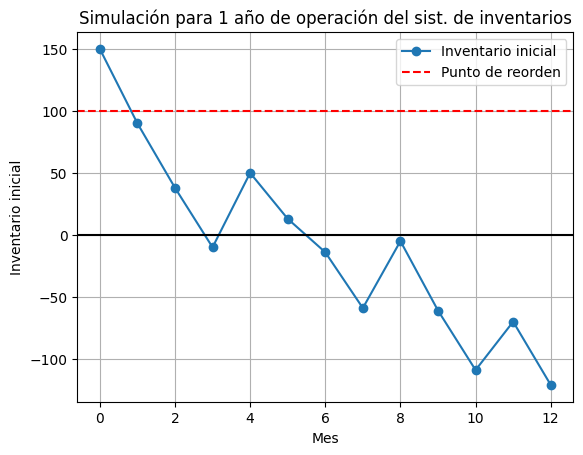

╒════════════════════╤══════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar inventario │   Costo de faltante │   Costo total │
╞════════════════════╪══════════════════════════════╪═════════════════════╪═══════════════╡
│                400 │                      1330.99 │               34950 │         36681 │
╘════════════════════╧══════════════════════════════╧═════════════════════╧═══════════════╛


In [41]:
EXP=experimento(100,200)

In [39]:
from scipy.optimize import minimize

In [42]:
def experimento_opti(q,R):
  inv_inicial=150
  inventario_i=[150]                          #Guarda inventario inicial en una lista
  inv_falt=0
  carga_pend=False                            #Indica que no hay carga pendiente
  t_entrega=0                                 #No hay tiempo de entrega
  cont=-1                                     #Contador para recibir la entrega (inicia en -1 para comenzar a contar desde la sig. iteracion)
  faltante=0                                  #Demanda faltante
  data=[]                                     #Lista para imprimir tabla
  cont_ent=0
  for m in range(12):                         #Ciclo de 12 meses
    mes=m+1
    dem,val=demanda()                         #Calcula demanda y número aleatorio generado para el mes correspondiente
    dem_ajus=demanda_ajustada(dem,mes)        #Calcula demanda ajustada

    inv_final=inv_inicial-dem_ajus            #Calcula demanda final
    inv_men_prom=(inv_inicial+dem_ajus)/2     #Calcula demanda promedio mensual



    if inv_final<=R and carga_pend==False:    #Condición: Se pasó el punto de reorden y no hay carga pendiente
      t_entrega,carga_pend,cont_ent=entrega(carga_pend,cont_ent)  #Calucla tiempo de entrega

    if carga_pend==True:                        #Contador para recibir la entrega aumenta en 1
      cont+=1

    if inv_final<0:                             #Si el inventario final es negativo, se imprime "-"
      faltante=abs(inv_final)
      data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", "-",f"{faltante}",f"{t_entrega}",f"{np.round(inv_inicial**2/(2*dem_ajus))}"])
      inv_falt+=faltante
    else:
      data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", f"{inv_final}",f"{faltante}",f"{t_entrega}",f"{np.round(inv_men_prom)}"])

    inv_inicial=inv_final                       #Inventario final pasa a ser inventario incial en el siguiente mes

    if cont==t_entrega:                         #Condición: Se cumple tiempo de entrega
      cont=-1                                   #Reinicia contador
      inv_inicial+=q                          #Aumenta el inventario +200
      carga_pend=False                          #Indica que ya no hay carga pendiente
      t_entrega=0                               #Reinicia tiempo de entrega

    faltante=0                                  #Reinicia inv. faltante
    inventario_i.append(inv_inicial)            #Guarda inventario inicial en una lista

  #Imprime tabla
  #headers = ['Mes', 'Inventario inicial' ,'No. aleatorio' ,'Demanda' ,'Demanda ajustada' , 'Inventario final','Faltante', 'Entrega', 'Inventario mensual promedio']
  #print(tabulate(data, headers=headers, tablefmt="fancy_grid",showindex=False))

  #grafica(inventario_i)

  suma_inv_prom = 0
  for fila in data:
    # Asumiendo que 'Inventario mensual promedio' es la última columna
    valor_str = fila[-1]
    suma_inv_prom += float(valor_str)

  costo=[cont_ent*R, suma_inv_prom*1.67 ,inv_falt*50,cont_ent*R+suma_inv_prom*1.67+inv_falt*50]
  costo_final(cont_ent, inv_falt)
  return cont_ent*R+suma_inv_prom*1.67+inv_falt*50

#OPTIMIZACIÓN

In [51]:
def funcion_objetivo(q, R):
    Z=experimento_opti(q,R)
    return Z

In [52]:
def explore(q, R, delta):
    # Función auxiliar para explorar en una dirección
    # delta es un vector que indica la dirección de exploración
    q_nueva = q + delta[0]
    R_nueva = R + delta[1]
    Z_nueva = funcion_objetivo(q_nueva, R_nueva)
    return q_nueva, R_nueva, Z_nueva

In [53]:
def hooke_jeeves(q_inicial, R_inicial, delta_inicial, tolerancia=1e-6):
    q = q_inicial
    R = R_inicial
    delta = delta_inicial

    while True:
        Z_actual = funcion_objetivo(q, R)
        q_best = q
        R_best = R
        Z_best = Z_actual

        # Exploración en una dirección
        q_nueva, R_nueva, Z_nueva = explore(q, R, delta)

        if Z_nueva < Z_best:
            q_best = q_nueva
            R_best = R_nueva
            Z_best = Z_nueva
        else:
            # Reducción del paso de exploración
            delta = (delta[0] / 2, delta[1] / 2)

        # Si la mejora es menor que la tolerancia, terminar
        if abs(Z_best - Z_actual) < tolerancia:
            break

        q = q_best
        R = R_best

    return q_best, R_best, Z_best

In [54]:
# Valores iniciales y tamaño de paso
q_inicial = 200.0
R_inicial = 100.0
delta_inicial = (0.1, 0.1)  # Tamaño de paso inicial

# Ejecutar el algoritmo de optimización
q_optimo, R_optimo, Z_optimo = hooke_jeeves(q_inicial, R_inicial, delta_inicial)

# Mostrar resultados
print(f"q óptimo: {q_optimo}")
print(f"R óptimo: {R_optimo}")
print(f"Z óptimo: {Z_optimo}")

╒════════════════════╤══════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar inventario │   Costo de faltante │   Costo total │
╞════════════════════╪══════════════════════════════╪═════════════════════╪═══════════════╡
│                300 │                      1330.99 │                   0 │       1630.99 │
╘════════════════════╧══════════════════════════════╧═════════════════════╧═══════════════╛
╒════════════════════╤══════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar inventario │   Costo de faltante │   Costo total │
╞════════════════════╪══════════════════════════════╪═════════════════════╪═══════════════╡
│                300 │                      1330.99 │                   0 │       1630.99 │
╘════════════════════╧══════════════════════════════╧═════════════════════╧═══════════════╛
╒════════════════════╤══════════════════════════════╤═════════════════════╤═════